<a href="https://colab.research.google.com/github/shivendrra/NLP-Projects/blob/main/Anthems%20Classifier/Kmeans_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving anthems.csv to anthems.csv


In [ ]:
df = pd.read_csv('anthems.csv')
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
import numpy as np
import os
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
documents = df['Anthem'].values.astype("U")
doc_arr = np.array(documents)
ps = PorterStemmer()

In [ ]:
corpus = []
words = []
for i in range(len(doc_arr)):
    sentence = doc_arr[i]
    sent_token = nltk.sent_tokenize(sentence)
    for i in range(0, len(sent_token)):
        review = re.sub('[^a-zA-Z]', ' ', sent_token[i])
        review = review.lower()
        review = review.split()

        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
    corpus.append(review)
cv = TfidfVectorizer()
x_features = cv.fit_transform(corpus).toarray()
len(x_features)

190

In [ ]:
from nltk.probability import FreqDist
sent_corp = ''
for o in range(len(corpus)):
  sent_corp = sent_corp + ''.join(corpus[o])
sent_words = nltk.word_tokenize(sent_corp)

from sklearn.feature_extraction.text import CountVectorizer
vp = CountVectorizer()
freq = FreqDist(sent_words)

In [ ]:
freq

FreqDist({'us': 56, 'land': 49, 'bless': 30, 'god': 30, 'let': 24, 'may': 22, 'nation': 22, 'live': 20, 'one': 19, 'love': 19, ...})

In [ ]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=190, n_init=1)
model.fit(x_features)

KMeans(max_iter=190, n_clusters=5, n_init=1)

In [ ]:
df['clusters'] = model.labels_
model_clusters = model.labels_
model_clusters

array([3, 1, 2, 2, 2, 0, 3, 4, 1, 2, 1, 0, 2, 1, 0, 2, 3, 2, 1, 4, 2, 2,
       2, 1, 3, 2, 3, 0, 0, 1, 3, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 4, 2, 0,
       4, 1, 1, 1, 0, 2, 4, 0, 1, 1, 2, 0, 1, 0, 2, 0, 3, 0, 2, 1, 3, 2,
       3, 4, 1, 4, 0, 0, 2, 3, 2, 0, 0, 1, 2, 0, 2, 4, 0, 0, 0, 0, 2, 4,
       0, 0, 3, 0, 1, 3, 3, 4, 2, 2, 4, 1, 1, 2, 0, 0, 4, 0, 2, 0, 4, 2,
       0, 4, 4, 0, 0, 2, 0, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 4,
       3, 1, 1, 1, 0, 3, 2, 3, 3, 1, 3, 2, 4, 1, 2, 3, 0, 0, 2, 2, 0, 3,
       3, 1, 3, 0, 3, 1, 4, 0, 0, 2, 3, 0, 1, 2, 2, 3, 0, 1, 3, 1, 0, 2,
       3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 3, 0], dtype=int32)

In [ ]:
len(model_clusters) == len(x_features)

True

ValueError: ignored

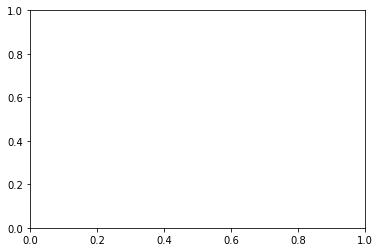

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=x_features, y=model_clusters, marker='o')